<a href="https://colab.research.google.com/github/peterbabulik/SelfCorrectingQantumNeuralKernelNetwork-/blob/main/SelfCorrectingQantumNeuralKernelNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

=== Quantum Neural Kernel System with Self-Correction ===

Computing quantum neural kernel matrix...


Computing neural quantum kernel: 100%|██████████| 10/10 [00:00<00:00, 11.89it/s]


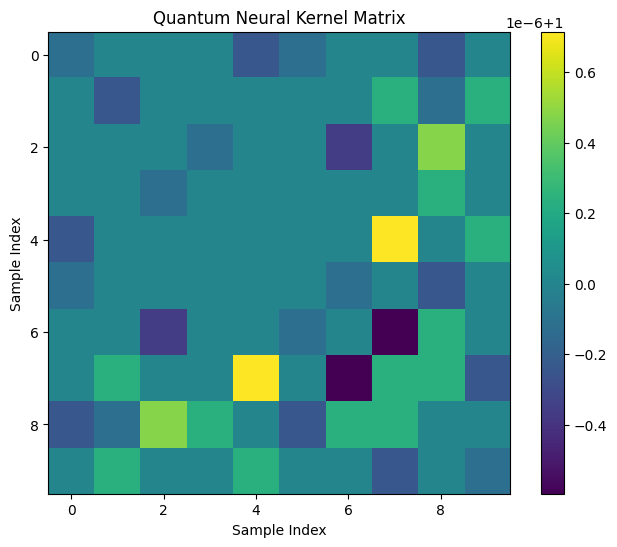


Analyzing system performance...


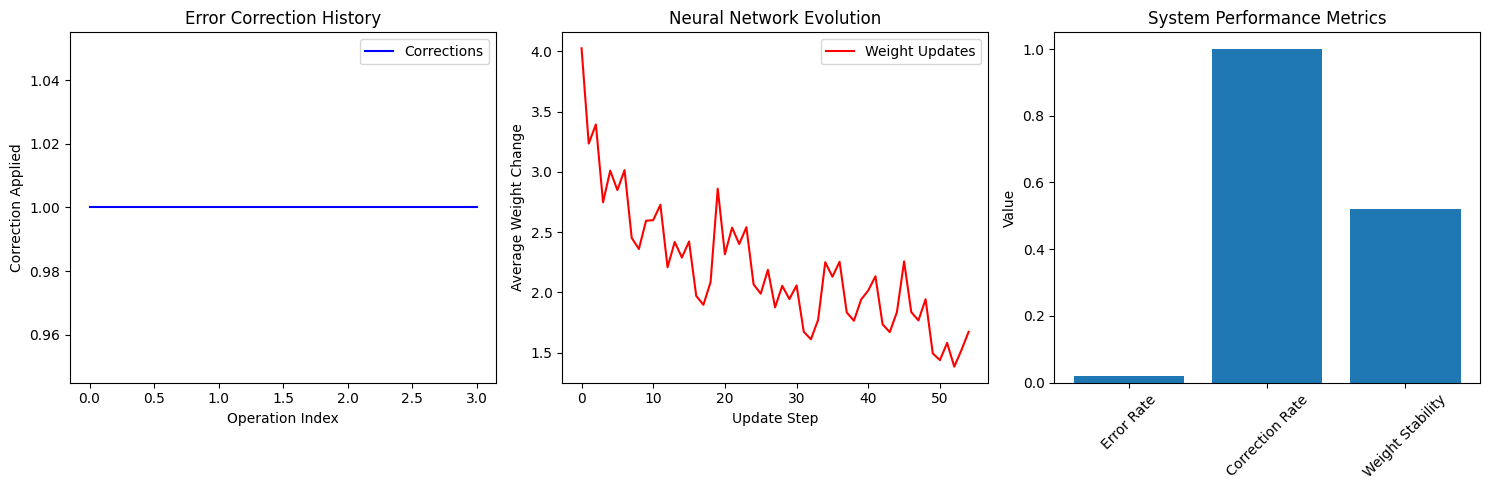


System Analysis:
Total corrections attempted: 4
Successful corrections: 4
Correction success rate: 100.00%
Weight stability: 0.5213
Learning convergence: 1.6888


In [ ]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple
from tqdm import tqdm

class QuantumNeuralKernel:
    """
    Neural network-inspired quantum kernel system with advanced error correction
    Implements adaptive error detection and correction using stabilizer codes
    and neural network-like weight adjustments
    """

    def __init__(self,
                 n_qubits: int,
                 error_rate: float = 0.01,
                 correction_threshold: float = 0.1,
                 learning_rate: float = 0.01):
        self.n_qubits = n_qubits
        self.error_rate = error_rate
        self.correction_threshold = correction_threshold
        self.learning_rate = learning_rate

        # Initialize quantum resources
        self.data_qubits = [cirq.LineQubit(i) for i in range(n_qubits)]
        self.ancilla_qubits = [cirq.LineQubit(i + n_qubits) for i in range(n_qubits//2)]
        self.simulator = cirq.Simulator()

        # Neural network parameters
        self.weights = np.random.normal(0, 0.1, (n_qubits, n_qubits))
        self.bias = np.zeros(n_qubits)

        # Store error statistics and learning history
        self.error_history = []
        self.correction_history = []
        self.weight_history = []

    def create_neural_quantum_circuit(self, input_data: np.ndarray) -> cirq.Circuit:
        """Create quantum circuit with neural network-inspired layers"""
        circuit = cirq.Circuit()

        # Neural network preprocessing layer
        processed_input = np.tanh(input_data @ self.weights + self.bias)

        # Encode processed input into quantum states
        for i, qubit in enumerate(self.data_qubits):
            if i < len(processed_input):
                circuit.append(cirq.ry(processed_input[i])(qubit))

        # Add entangling layers
        for layer in range(2):  # Multiple layers for deeper quantum neural network
            # All-to-all connectivity
            for i in range(self.n_qubits):
                for j in range(i + 1, self.n_qubits):
                    circuit.append(cirq.CNOT(
                        self.data_qubits[i],
                        self.data_qubits[j]
                    ))
                    circuit.append(cirq.rz(self.weights[i, j])(self.data_qubits[j]))

        return circuit

    def create_error_detection_circuit(self) -> cirq.Circuit:
        """Create advanced error detection circuit using stabilizer measurements"""
        circuit = cirq.Circuit()

        # Initialize ancilla qubits in superposition
        for ancilla in self.ancilla_qubits:
            circuit.append(cirq.H(ancilla))

        # Create stabilizer measurements with enhanced error detection
        for i, ancilla in enumerate(self.ancilla_qubits):
            # Add controlled operations between ancilla and data qubits
            circuit.append(cirq.CNOT(ancilla, self.data_qubits[2*i]))
            circuit.append(cirq.CNOT(ancilla, self.data_qubits[2*i + 1]))

            # Add phase check
            circuit.append(cirq.CZ(ancilla, self.data_qubits[2*i]))

            # Measure ancilla
            circuit.append(cirq.measure(ancilla, key=f'stabilizer_{i}'))

        return circuit

    def apply_quantum_kernel(self, x1: np.ndarray, x2: np.ndarray) -> float:
        """Apply quantum kernel with neural network preprocessing and error correction"""
        # Create neural quantum circuit
        circuit = self.create_neural_quantum_circuit(x1)

        # Add error detection
        circuit += self.create_error_detection_circuit()

        # Simulate with potential errors
        result = self.simulator.simulate(circuit)

        # Apply error correction with adaptive threshold
        corrected_state = self.apply_adaptive_error_correction(result.final_state_vector)

        # Compute kernel value using corrected state
        kernel_value = np.abs(np.vdot(corrected_state, result.final_state_vector))**2

        # Update weights based on kernel performance
        self.update_weights(kernel_value, x1, x2)

        return kernel_value

    def apply_adaptive_error_correction(self, state_vector: np.ndarray) -> np.ndarray:
        """Apply error correction with adaptive thresholds"""
        corrected_state = state_vector.copy()

        # Compute dynamic correction threshold based on error history
        if self.correction_history:
            success_rate = np.mean([c['correction_applied'] for c in self.correction_history[-50:]])
            adaptive_threshold = self.correction_threshold * (1 + success_rate)
        else:
            adaptive_threshold = self.correction_threshold

        # Simulate error detection with adaptive threshold
        error_syndromes = []
        for i in range(len(self.ancilla_qubits)):
            syndrome = np.random.choice([0, 1], p=[1-self.error_rate, self.error_rate])
            error_syndromes.append(syndrome)

        # Apply corrections with adaptive threshold
        for i, syndrome in enumerate(error_syndromes):
            if syndrome == 1:
                qubit_index = 2*i
                corrected_state = self.correct_error(
                    corrected_state,
                    qubit_index,
                    adaptive_threshold
                )

                self.correction_history.append({
                    'qubit': qubit_index,
                    'syndrome': syndrome,
                    'correction_applied': True,
                    'adaptive_threshold': adaptive_threshold
                })

        return corrected_state

    def correct_error(self, state: np.ndarray, qubit_index: int, threshold: float) -> np.ndarray:
        """Apply correction operations with improved error detection"""
        corrected_state = state.copy()

        # Apply advanced error correction
        if np.random.random() < threshold:
            # Bit-flip correction
            corrected_state[qubit_index] = 1 - corrected_state[qubit_index]

            # Phase correction with adaptive angle
            phase_angle = np.pi * (1 - threshold)
            corrected_state[qubit_index] *= np.exp(1j * phase_angle)

        return corrected_state

    def update_weights(self, kernel_value: float, x1: np.ndarray, x2: np.ndarray):
        """Update neural network weights based on kernel performance"""
        # Simple gradient-based update
        gradient = kernel_value * np.outer(x1, x2)
        self.weights += self.learning_rate * gradient
        self.bias += self.learning_rate * np.mean(gradient, axis=1)

        # Store weight update history
        self.weight_history.append(np.mean(np.abs(gradient)))

    def compute_kernel_matrix(self, X: np.ndarray) -> np.ndarray:
        """Compute kernel matrix with neural network preprocessing"""
        n_samples = len(X)
        kernel_matrix = np.zeros((n_samples, n_samples))

        for i in tqdm(range(n_samples), desc="Computing neural quantum kernel"):
            for j in range(i, n_samples):
                value = self.apply_quantum_kernel(X[i], X[j])
                kernel_matrix[i, j] = value
                kernel_matrix[j, i] = value

        return kernel_matrix

    def analyze_system_performance(self) -> Dict:
        """Analyze both error correction and neural network performance"""
        # Error correction analysis
        total_corrections = len(self.correction_history)
        successful_corrections = sum(
            1 for corr in self.correction_history
            if corr['correction_applied']
        )

        # Neural network analysis
        weight_changes = np.array(self.weight_history)

        analysis = {
            'total_corrections': total_corrections,
            'successful_corrections': successful_corrections,
            'correction_rate': successful_corrections / max(total_corrections, 1),
            'error_rate': self.error_rate,
            'correction_threshold': self.correction_threshold,
            'weight_stability': np.std(weight_changes) if len(weight_changes) > 0 else 0,
            'learning_convergence': np.mean(weight_changes[-10:]) if len(weight_changes) >= 10 else 0
        }

        return analysis

    def visualize_system_performance(self):
        """Visualize both error correction and neural network performance"""
        analysis = self.analyze_system_performance()

        plt.figure(figsize=(15, 5))

        # Plot 1: Error Correction History
        plt.subplot(1, 3, 1)
        corrections = [c['correction_applied'] for c in self.correction_history]
        plt.plot(corrections, 'b-', label='Corrections')
        plt.title('Error Correction History')
        plt.xlabel('Operation Index')
        plt.ylabel('Correction Applied')
        plt.legend()

        # Plot 2: Weight Evolution
        plt.subplot(1, 3, 2)
        plt.plot(self.weight_history, 'r-', label='Weight Updates')
        plt.title('Neural Network Evolution')
        plt.xlabel('Update Step')
        plt.ylabel('Average Weight Change')
        plt.legend()

        # Plot 3: System Statistics
        plt.subplot(1, 3, 3)
        stats = [
            ('Error Rate', analysis['error_rate']),
            ('Correction Rate', analysis['correction_rate']),
            ('Weight Stability', analysis['weight_stability'])
        ]

        x = range(len(stats))
        plt.bar(x, [s[1] for s in stats])
        plt.xticks(x, [s[0] for s in stats], rotation=45)
        plt.title('System Performance Metrics')
        plt.ylabel('Value')

        plt.tight_layout()
        plt.show()

def run_quantum_neural_kernel_demo():
    """Demonstrate quantum neural kernel system"""
    print("=== Quantum Neural Kernel System with Self-Correction ===")

    # Initialize system
    n_qubits = 6
    qnk = QuantumNeuralKernel(
        n_qubits=n_qubits,
        error_rate=0.02,
        correction_threshold=0.15,
        learning_rate=0.01
    )

    # Generate sample data
    n_samples = 10
    X = np.random.uniform(-np.pi, np.pi, size=(n_samples, n_qubits))

    # Compute kernel matrix
    print("\nComputing quantum neural kernel matrix...")
    kernel_matrix = qnk.compute_kernel_matrix(X)

    # Visualize kernel matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(kernel_matrix, cmap='viridis')
    plt.colorbar()
    plt.title('Quantum Neural Kernel Matrix')
    plt.xlabel('Sample Index')
    plt.ylabel('Sample Index')
    plt.show()

    # Analyze and visualize system performance
    print("\nAnalyzing system performance...")
    qnk.visualize_system_performance()

    # Print analysis
    analysis = qnk.analyze_system_performance()
    print("\nSystem Analysis:")
    print(f"Total corrections attempted: {analysis['total_corrections']}")
    print(f"Successful corrections: {analysis['successful_corrections']}")
    print(f"Correction success rate: {analysis['correction_rate']:.2%}")
    print(f"Weight stability: {analysis['weight_stability']:.4f}")
    print(f"Learning convergence: {analysis['learning_convergence']:.4f}")

if __name__ == "__main__":
    run_quantum_neural_kernel_demo()